# Exponentes de Lyapunov del sistema

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def lyapunov(var_0, mu):
    dim = 4 

    def funciones_y_J(var):
        x,y,z,w = var
        F = [z, w, -x*(1 + 2*mu*(y**2)), -y*(1 + 2*mu*(x**2))]
        J = np.array([[0,0,1,0],[0,0,0,1],[-1-2*mu*(y**2), -4*mu*x*y, 0, 0],[-4*mu*x*y, -1-2*mu*(x**2), 0, 0]])
        return np.array(F), np.array(J)

    def QR(var_gen):
        M = var_gen[dim:dim + dim**2].reshape([dim,dim])
        L = var_gen[dim + dim**2:2*dim + dim**2]
        F, J = funciones_y_J(var_gen[:dim])
        A = M.T.dot(J.dot(M))
        dL = (np.diag(A)).copy()
        
        for i in range(dim):
            A[i,i] = 0
            for j in range(i+1,dim): A[i,j] = -A[j,i]
        dM = M.dot(A)
        
        return np.concatenate([F,dM.flatten(),dL])

    def QR_t(var_gen,t):
        return QR(var_gen)

    var0 = np.array(var_0)
    M0 = np.identity(dim)
    L0 = np.zeros(dim)
    var_gen0 = np.concatenate([var0, M0.flatten(), L0])
    t = np.linspace(0,5000,10001)
    var_gen = odeint(QR_t,var_gen0,t, hmax=0.05)

    x, y, z, w = var_gen[:,0], var_gen[:,1], var_gen[:,2], var_gen[:,3]     
    M = []
    for iter in range(len(t)): M.append( var_gen[iter, dim:dim + dim**2].reshape([dim,dim]) )
    M = np.array(M)


    ind_tmin = 10
    exp_1, exp_2, exp_3, exp_4 = var_gen[ind_tmin:, 20].T/t[ind_tmin:], var_gen[ind_tmin:, 21].T/t[ind_tmin:], var_gen[ind_tmin:, 22].T/t[ind_tmin:], var_gen[ind_tmin:, 23].T/t[ind_tmin:]

    return t[ind_tmin:], exp_1, exp_2, exp_3, exp_4

## Exponentes para distintas condiciones iniciales 

In [9]:
t, exp_1_1, exp_2_1, exp_3_1, exp_4_1 =  lyapunov([-0.13042949438871965, -0.6999802501335068, -1.926754047598378, -1.1855027121329815], 0.0) # mu = 0, E = 5
t, exp_1_2, exp_2_2, exp_3_2, exp_4_2 =  lyapunov([1.1816442631577928, -1.870965383503588, -0.4046362978977369, -0.32326249321531364], 0.1) # mu = 0.1, E = 5
t, exp_1_3, exp_2_3, exp_3_3, exp_4_3 =  lyapunov([-0.5182659663211009, -0.12222369972824332, -2.0678688521037905, 0.5046428445414275], 0.5) # mu = 0.5, E = 5
t, exp_1_4, exp_2_4, exp_3_4, exp_4_4 =  lyapunov([-0.7031037815893733, 1.1187538279450457, -0.9357672563970117, -1.5701274365269224], 0.8) # mu = 0.8, E = 5

t, exp_1_5, exp_2_5, exp_3_5, exp_4_5 =  lyapunov([-0.5956396270076691, -0.7898336373335901, -2.547344503541943, 0.7104596101745955], 0.0) # mu = 0, E = 10
t, exp_1_6, exp_2_6, exp_3_6, exp_4_6 =  lyapunov([0.9757419943335002, 0.7224562469656437, -2.3895131425820444, 1.0120109576497605], 0.1) # mu = 0.1, E = 10
t, exp_1_7, exp_2_7, exp_3_7, exp_4_7 =  lyapunov([-1.854519788944284, -0.23016010366559136, -0.9354534524551508, -2.198144448178276], 0.5) # mu = 0.5, E = 10
t, exp_1_8, exp_2_8, exp_3_8, exp_4_8 =  lyapunov([-1.3136403456979036, -1.364152834806248, -1.871908529576837, -0.18748604711866967], 0.8) # mu = 0.8, E = 10

t, exp_1_9, exp_2_9, exp_3_9, exp_4_9 =  lyapunov([0.7851269333040083, -0.9801310201581899, -3.125525467032015, -0.9277913730789571], 0.0) # mu = 0, E = 20
t, exp_1_10, exp_2_10, exp_3_10, exp_4_10 =  lyapunov([-1.68352041124297, -0.18609281820212153, -0.3599224461838769, -3.1520514926058762], 0.1) # mu = 0.1, E = 20
t, exp_1_11, exp_2_11, exp_3_11, exp_4_11 =  lyapunov([-0.24214102494585177, 2.6991153973005737, -2.0991096602308716, -1.368421870895629], 0.5) # mu = 0.5, E = 20
t, exp_1_12, exp_2_12, exp_3_12, exp_4_12 =  lyapunov([-1.7561869757833488, -0.023700779786970827, -2.748738928854956, -0.9313632825961111], 0.8) # mu = 0.8, E = 20

t, exp_1_13, exp_2_13, exp_3_13, exp_4_13 =  lyapunov([-2.1994523699149244, -0.10627764319658084, -3.246914288923688, 1.7553514001045265], 0.0) # mu = 0, E = 40
t, exp_1_14, exp_2_14, exp_3_14, exp_4_14 =  lyapunov([-1.6344536073918388, -1.2093850947738982, -3.520311935237415, -1.5303417606349505], 0.1) # mu = 0.1, E = 40
t, exp_1_15, exp_2_15, exp_3_15, exp_4_15 =  lyapunov([-3.484080263757452, -0.2286541518977785, -1.909974224436045, 0.9812087122449675], 0.5) # mu = 0.5, E = 40
t, exp_1_16, exp_2_16, exp_3_16, exp_4_16 =  lyapunov([1.403305967440268, 2.4279869078746366, -2.5781292960569, -1.9948209017910479], 0.8) # mu = 0.8, E = 40

t, exp_1_17, exp_2_17, exp_3_17, exp_4_17 =  lyapunov([-0.017546965651174418, -1.545015316243001, -3.741018530108333, 3.2938079189818694], 0.0) # mu = 0, E = 60
t, exp_1_18, exp_2_18, exp_3_18, exp_4_18 =  lyapunov([-3.348972680055457, 1.2342146306061466, -2.7003554040386595, -1.9518550635922836], 0.1) # mu = 0.1, E = 60
t, exp_1_19, exp_2_19, exp_3_19, exp_4_19 =  lyapunov([2.540764309827228, 1.7600047837110395, -1.7949058347265845, -3.3740792766194705], 0.5) # mu = 0.5, E = 60
t, exp_1_20, exp_2_20, exp_3_20, exp_4_20 =  lyapunov([3.656592017734745, 0.25011878177750013, -2.3835830048269155, 2.0539497768498514], 0.8) # mu = 0.8, E = 60

t, exp_1_21, exp_2_21, exp_3_21, exp_4_21 =  lyapunov([-3.107331201580056, -1.4857587014752678, -3.4087937020003447, 2.4699404071801894], 0.0) # mu = 0, E = 80
t, exp_1_22, exp_2_22, exp_3_22, exp_4_22 =  lyapunov([-1.762453667275727, -1.5771018461606179, -4.44413823904676, -0.6391308324797436], 0.1) # mu = 0.1, E = 80
t, exp_1_23, exp_2_23, exp_3_23, exp_4_23 =  lyapunov([3.7565183931487383, -0.9015801391567422, -2.525356006102451, -2.6465001225331655], 0.5) # mu = 0.5, E = 80
t, exp_1_24, exp_2_24, exp_3_24, exp_4_24 =  lyapunov([0.0454371017015216, -3.0957678246073357, -4.085343412748127, -2.385951525937852], 0.8) # mu = 0.8, E = 80

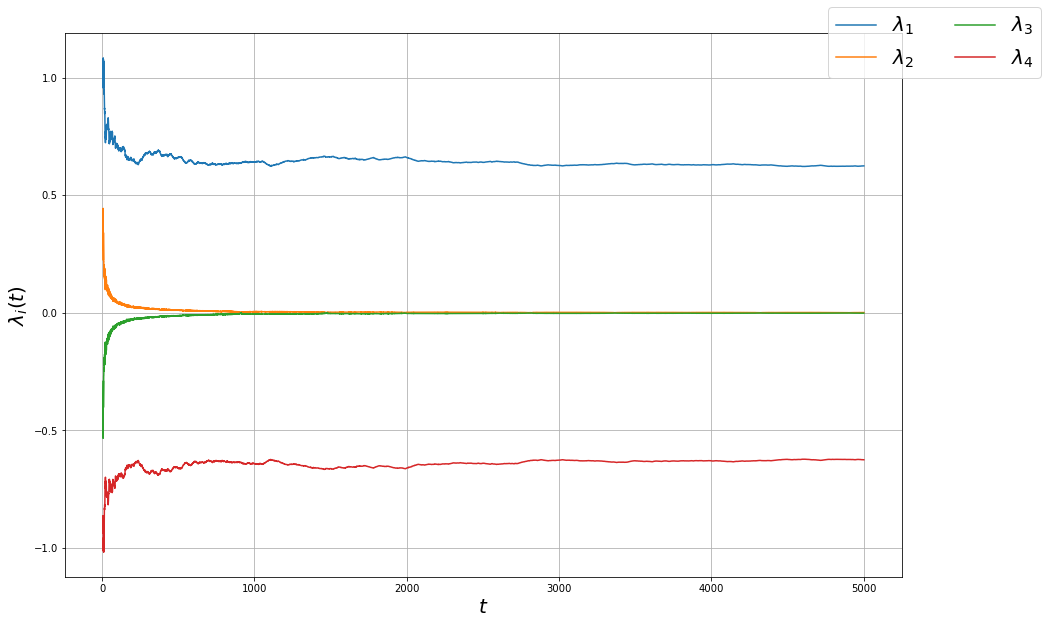

In [14]:
figura = plt.figure(figsize=(15,10))

plt.grid(b=True)
plt.plot(t,exp_1_23, label = r"$\lambda_1$")
plt.plot(t,exp_2_23, label = r"$\lambda_2$")
plt.plot(t,exp_3_23, label = r"$\lambda_3$")
plt.plot(t,exp_4_23, label = r"$\lambda_4$")
plt.xlabel(r"$t$",fontsize=20)
plt.ylabel(r"$\lambda_i(t)$",fontsize=20)
#plt.xlim(xmin=10)
#plt.ylim(ymin=-0.025, ymax=0.025)
plt.legend(fontsize=20, ncol = 2, bbox_to_anchor=(0.9, 0.9))
plt.show()

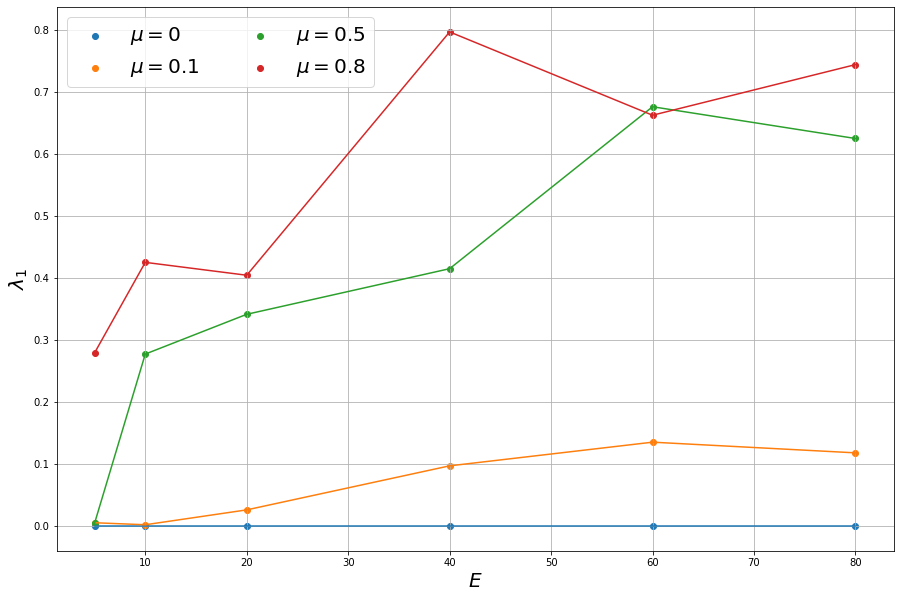

In [23]:
Energias = [5,10,20,40,60,80]
puntos_mu0 = [exp_1_1[-1], exp_1_5[-1], exp_1_9[-1], exp_1_13[-1], exp_1_17[-1], exp_1_21[-1]]
puntos_mu0p1 = [exp_1_2[-1], exp_1_6[-1], exp_1_10[-1], exp_1_14[-1], exp_1_18[-1], exp_1_22[-1]]
puntos_mu0p5 = [exp_1_3[-1], exp_1_7[-1], exp_1_11[-1], exp_1_15[-1], exp_1_19[-1], exp_1_23[-1]]
puntos_mu0p8 = [exp_1_4[-1], exp_1_8[-1], exp_1_12[-1], exp_1_16[-1], exp_1_20[-1], exp_1_24[-1]]


figura = plt.figure(figsize=(15,10))

plt.grid(b=True)
plt.scatter(Energias,puntos_mu0, label = r"$\mu=0$")
plt.scatter(Energias,puntos_mu0p1, label = r"$\mu=0.1$")
plt.scatter(Energias,puntos_mu0p5, label = r"$\mu=0.5$")
plt.scatter(Energias,puntos_mu0p8, label = r"$\mu=0.8$")


plt.plot(Energias,puntos_mu0)
plt.plot(Energias,puntos_mu0p1)
plt.plot(Energias,puntos_mu0p5)
plt.plot(Energias,puntos_mu0p8)
plt.xlabel(r"$E$",fontsize=20)
plt.ylabel(r"$\lambda_1$",fontsize=20)
#plt.xlim(xmin=10)
#plt.ylim(ymin=-0.025, ymax=0.025)
plt.legend(fontsize=20, ncol = 2)
plt.show()

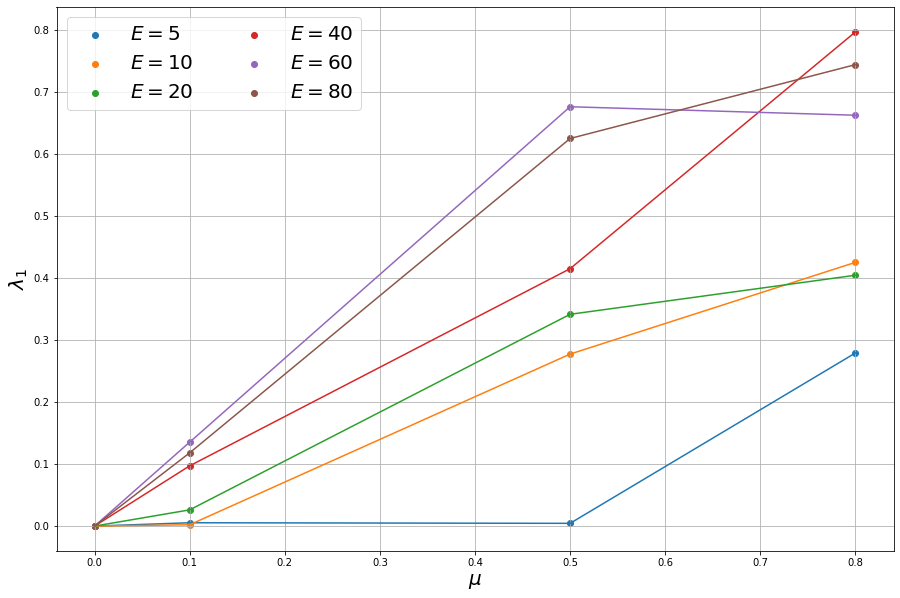

In [25]:
mus = [0, 0.1, 0.5, 0.8]
puntos_E5 = [exp_1_1[-1], exp_1_2[-1], exp_1_3[-1], exp_1_4[-1]]
puntos_E10 = [exp_1_5[-1], exp_1_6[-1], exp_1_7[-1], exp_1_8[-1]]
puntos_E20 = [exp_1_9[-1], exp_1_10[-1], exp_1_11[-1], exp_1_12[-1]]
puntos_E40 = [exp_1_13[-1], exp_1_14[-1], exp_1_15[-1], exp_1_16[-1]]
puntos_E60 = [exp_1_17[-1], exp_1_18[-1], exp_1_19[-1], exp_1_20[-1]]
puntos_E80 = [exp_1_21[-1], exp_1_22[-1], exp_1_23[-1], exp_1_24[-1]]


figura = plt.figure(figsize=(15,10))

plt.grid(b=True)
plt.scatter(mus,puntos_E5, label = r"$E=5$")
plt.scatter(mus,puntos_E10, label = r"$E=10$")
plt.scatter(mus,puntos_E20, label = r"$E=20$")
plt.scatter(mus,puntos_E40, label = r"$E=40$")
plt.scatter(mus,puntos_E60, label = r"$E=60$")
plt.scatter(mus,puntos_E80, label = r"$E=80$")

plt.plot(mus,puntos_E5)
plt.plot(mus,puntos_E10)
plt.plot(mus,puntos_E20)
plt.plot(mus,puntos_E40)
plt.plot(mus,puntos_E60)
plt.plot(mus,puntos_E80)
plt.xlabel(r"$\mu$",fontsize=20)
plt.ylabel(r"$\lambda_1$",fontsize=20)
#plt.xlim(xmin=10)
#plt.ylim(ymin=-0.025, ymax=0.025)
plt.legend(fontsize=20, ncol = 2)
plt.show()